# 10 Academy: Artificial Intelligence Mastery

## Project: Change point analysis and statistical modelling of time series data - detecting changes and associating causes on time series data

### Data Preparation Events and BrentOilPrice
#### Ethel.C
This notebook merges Brent oil price data with key events, analyzes the data, and visualizes the results using the updated `data_events.py`. Outputs are right-justified for readability.

In [1]:
import sys

import pandas as pd
import matplotlib.pyplot as plt

scripts_dir = r'E:\DS+ML\AIM3\Week.10\Week.10.Brent_Oil_Price_Impacts\scripts'
src_dir = r'E:\DS+ML\AIM3\Week.10\Week.10.Brent_Oil_Price_Impacts\src'
data_path = r"E:\DS+ML\AIM3\Week.10\Data\BrentOilPrices.csv"
output_dir = r"E:\DS+ML\AIM3\Week.10\Data"
if scripts_dir not in sys.path:
    sys.path.append(scripts_dir)
if src_dir not in sys.path:
    sys.path.append(src_dir)

In [2]:
from data_load import load_brent_data
from data_events import create_events_data, major_events, plot_price_events

### Load Brent oil price data

In [3]:

brent_data = load_brent_data(data_path)
print("Brent Data Preview:")
brent_data.head()

Brent Data Preview:


,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [4]:
events = create_events_data(output_dir)
print("Key Events (1987–2022):")
print(events)

Events saved to 'E:\DS+ML\AIM3\Week.10\Data\key_events_1987_2022.csv'
Key Events (1987–2022):
         Date           Event_Type  \
0  1987-07-01          OPEC Policy   
1  1988-07-18  Conflict Resolution   
2  1989-02-15            Sanctions   
3  1989-12-20   Political Decision   
4  1990-08-02             Conflict   
..        ...                  ...   
95 2021-07-18          OPEC Policy   
96 2021-10-04          OPEC Policy   
97 2022-02-24             Conflict   
98 2022-06-02          OPEC Policy   
99 2022-09-05          OPEC Policy   

                                    Event_Description  
0   OPEC stabilizes prices post-1986 glut with quo...  
1           Iran-Iraq War ends; oil supply stabilizes  
2                   U.S. sanctions on Libya tightened  
3   U.S. Strategic Petroleum Reserve release annou...  
4   Iraq invades Kuwait; Gulf War begins, oil supp...  
..                                                ...  
95        OPEC+ agrees to gradual production increase  
9

### Sort data

In [5]:
brent_data = brent_data.sort_values('Date')
events = events.sort_values('Date')

### Merge with asof to match events to nearest prior trading day

In [6]:
merged_data = pd.merge_asof(brent_data, events, on='Date', direction='backward', 
                            tolerance=pd.Timedelta('5 days'))
merged_data['Event_Type'] = merged_data['Event_Type'].fillna('None')
merged_data['Event_Description'] = merged_data['Event_Description'].fillna('None')
merged_data['Returns'] = merged_data['Price'].pct_change() * 100
major_event_dates = major_events()
# Filter major events
event_rows = merged_data[merged_data['Event_Type'] != 'None']
major_events_df = event_rows[event_rows['Date'].isin(pd.to_datetime(major_event_dates))]
print("Merged Data Preview:")
print(merged_data.head(2))
print(merged_data.tail(5))
print(f"Total Rows in Merged Data: {len(merged_data)}")
print("Major Events:")
print(major_events_df[['Date', 'Price', 'Event_Type', 'Event_Description', 'Returns']])


Merged Data Preview:
        Date  Price Event_Type Event_Description   Returns
0 1987-05-20  18.63       None              None       NaN
1 1987-05-21  18.45       None              None -0.966184
           Date  Price   Event_Type  \
8355 2020-04-15  19.80  OPEC Policy   
8356 2020-04-16  18.69  OPEC Policy   
8357 2020-04-17  19.75  OPEC Policy   
8358 2020-04-20  17.36         None   
8359 2020-04-21   9.12         None   

                                 Event_Description    Returns  
8355  OPEC+ agrees to historic 9.7 million bpd cut  -8.923643  
8356  OPEC+ agrees to historic 9.7 million bpd cut  -5.606061  
8357  OPEC+ agrees to historic 9.7 million bpd cut   5.671482  
8358                                          None -12.101266  
8359                                          None -47.465438  
Total Rows in Merged Data: 8360
Major Events:
           Date   Price           Event_Type  \
29   1987-07-01   18.98          OPEC Policy   
818  1990-08-02   22.25             Confl

### Display plot

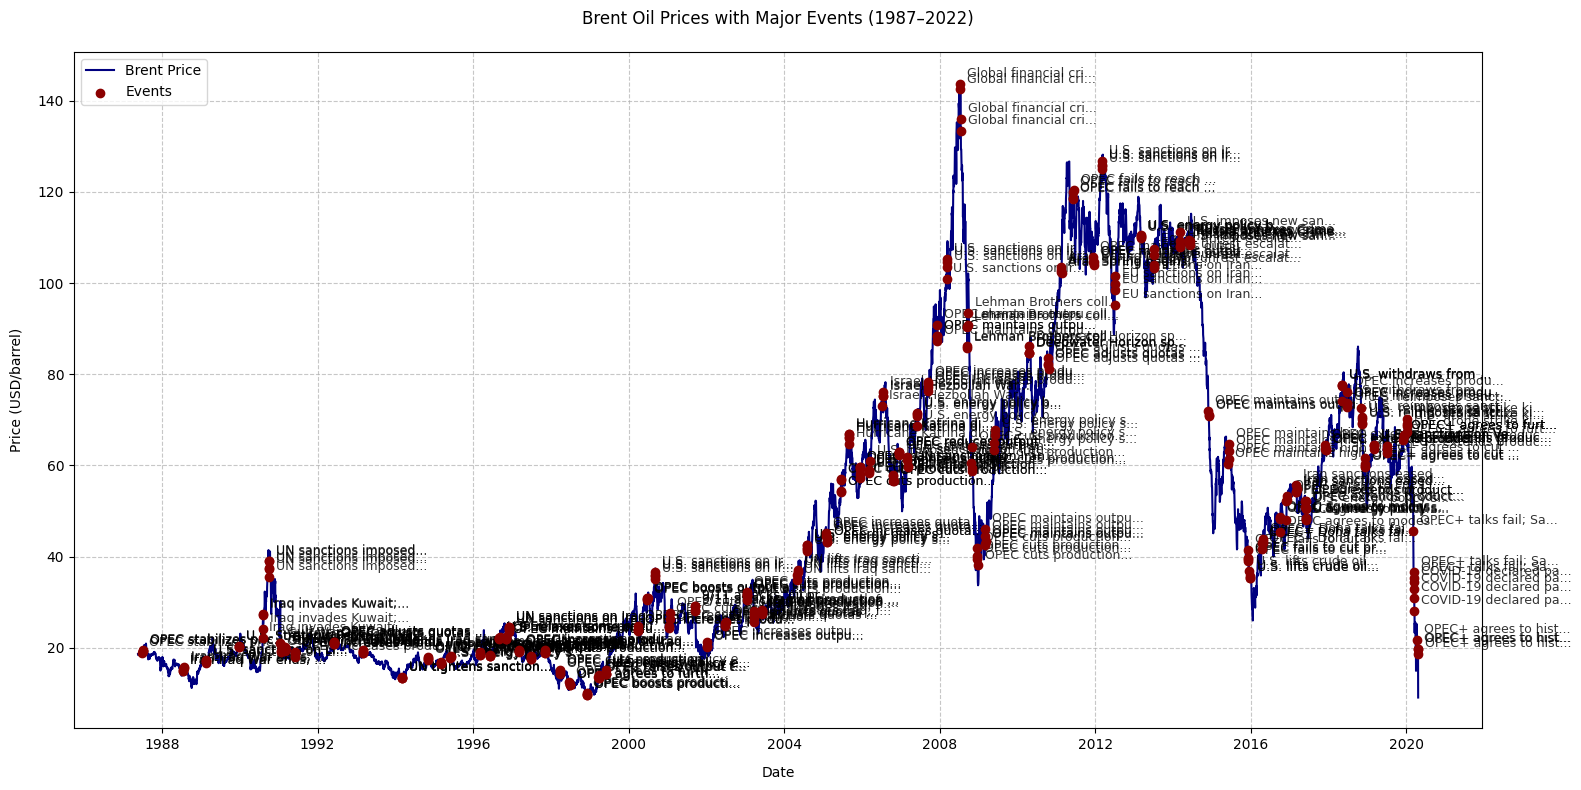

In [7]:
fig = plot_price_events(merged_data, price_color='navy',event_color='darkred',annot_size=9,figsize=(16, 8))
plt.show()

#### Save merged data to CSV

In [8]:
# Save merged data to CSV
output_path = r"E:\DS+ML\AIM3\Week.10\Data\merged_brent_events.csv"
merged_data.to_csv(output_path, index=False)
print(f"Merged data saved to: {output_path}".rjust(50))

Merged data saved to: E:\DS+ML\AIM3\Week.10\Data\merged_brent_events.csv
